# CRÍTICA DE PELÍCULAS

## Importación de las librerias

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup complete')

Setup complete


## Introducción

In [46]:
df_peliculas = pd.DataFrame({'Opinion': np.array([5,4,3,2,1,0]), 'Cantidad de votantes': np.array([40, 99, 145, 133, 96, 40])})

In [47]:
df_peliculas #IMPRIMIR EL DATAFRAME

,Opinion,Cantidad de votantes
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96
5,0,40


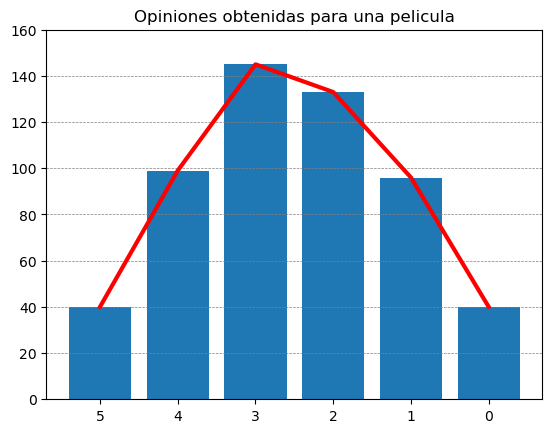

In [48]:
fig, ax = plt.subplots()
ax.grid(axis = 'y', color = 'gray', linestyle = '--', linewidth = 0.5) #REJILLA
ax.bar(df_peliculas['Opinion'], df_peliculas['Cantidad de votantes'])
ax.plot(df_peliculas['Opinion'], df_peliculas['Cantidad de votantes'], color = 'red', linewidth = 3)
ax.set_ylim([0, 160])
ax.invert_xaxis() #INVIERTE EL EJE X
ax.set_title('Opiniones obtenidas para una pelicula')
plt.savefig('gráficas/curva_gauss.png')
plt.show()

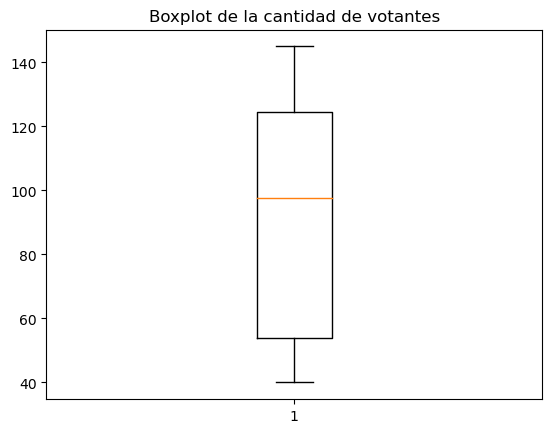

In [49]:
fig, ax = plt.subplots()
ax.boxplot(df_peliculas['Cantidad de votantes'])
ax.set_title('Boxplot de la cantidad de votantes')
plt.savefig('gráficas/boxplot.png')
plt.show()

In [50]:
df_peliculas.columns = ['Opinion (Xi)', 'Cantidad de votantes (ni)']
df_peliculas.head()

,Opinion (Xi),Cantidad de votantes (ni)
0,5,40
1,4,99
2,3,145
3,2,133
4,1,96


## Cálculos estadísticos

In [51]:
df_peliculas_f2 = df_peliculas.copy()

### **Cálculo de la media**

In [52]:
df_peliculas_f2['Xi * ni'] = df_peliculas_f2['Opinion (Xi)'] * df_peliculas_f2['Cantidad de votantes (ni)']

In [53]:
df_peliculas_f2.head()

,Opinion (Xi),Cantidad de votantes (ni),Xi * ni
0,5,40,200
1,4,99,396
2,3,145,435
3,2,133,266
4,1,96,96


In [54]:
suma_productos = df_peliculas_f2['Xi * ni'].sum()
suma_frecuencias_rel = df_peliculas_f2['Cantidad de votantes (ni)'].sum()
media = suma_productos / suma_frecuencias_rel
print('La media es: ', round(media, 3))

La media es:  2.519


### **Cálculo de la varianza**

In [55]:
df_peliculas_f2['Ni* ((Xi-media)2)'] = round(df_peliculas_f2['Cantidad de votantes (ni)'] * ((df_peliculas_f2['Opinion (Xi)'] - media)**2), 3)
df_peliculas_f2.head()

,Opinion (Xi),Cantidad de votantes (ni),Xi * ni,Ni* ((Xi-media)2)
0,5,40,200,246.217
1,4,99,396,217.146
2,3,145,435,33.549
3,2,133,266,35.823
4,1,96,96,221.503


In [56]:
varianza = df_peliculas_f2['Ni* ((Xi-media)2)'].sum() / suma_frecuencias_rel
print('La varianza es: ', round(varianza, 3))

La varianza es:  1.823


In [57]:
desviacion_tip = np.sqrt(varianza)
print('La desviacion tipica es: ', round(desviacion_tip, 3))

La desviacion tipica es:  1.35


### **Cálculo de intervalos de confianza**

**68%**

In [58]:
porcentaje_1 = 0.68
limite_inferior = int(media - desviacion_tip)
limite_superior = int(media + desviacion_tip)
observaciones = df_peliculas_f2[(df_peliculas_f2['Opinion (Xi)'] >= limite_inferior) & (df_peliculas_f2['Opinion (Xi)'] <= limite_superior)]

In [59]:
print('------------------------- RESULTADOS -------------------------')
print('El intervalo de confianza del ', porcentaje_1 * 100, '% es: ', round(limite_inferior, 2), ' - ', round(limite_superior, 2))
print('Cantidad de observaciones totales: ', suma_frecuencias_rel)
print('Cantidad de observaciones en el intervalo: ', observaciones['Cantidad de votantes (ni)'].sum())
print('Porcentaje de observaciones en el intervalo: ', round(observaciones['Cantidad de votantes (ni)'].sum()/suma_frecuencias_rel * 100, 2), '%')

------------------------- RESULTADOS -------------------------
El intervalo de confianza del  68.0 % es:  1  -  3
Cantidad de observaciones totales:  553
Cantidad de observaciones en el intervalo:  374
Porcentaje de observaciones en el intervalo:  67.63 %


**95%**

In [60]:
porcentaje_2 = 0.95
limite_inferior = max(int(media - 2*desviacion_tip),0)
limite_superior = min(int(media + 2*desviacion_tip), 5)
observaciones = df_peliculas_f2[(df_peliculas_f2['Opinion (Xi)'] >= limite_inferior) & (df_peliculas_f2['Opinion (Xi)'] <= limite_superior)]

In [61]:
print('------------------------- RESULTADOS -------------------------')
print('El intervalo de confianza del ', porcentaje_2 * 100, '% es: ', round(limite_inferior, 2), ' - ', round(limite_superior, 2))
print('Cantidad de observaciones totales: ', suma_frecuencias_rel)
print('Cantidad de observaciones en el intervalo: ', observaciones['Cantidad de votantes (ni)'].sum())
print('Porcentaje de observaciones en el intervalo: ', round(observaciones['Cantidad de votantes (ni)'].sum()/suma_frecuencias_rel * 100, 2), '%')

------------------------- RESULTADOS -------------------------
El intervalo de confianza del  95.0 % es:  0  -  5
Cantidad de observaciones totales:  553
Cantidad de observaciones en el intervalo:  553
Porcentaje de observaciones en el intervalo:  100.0 %


**97%**

In [62]:
porcentaje_3 = 0.95
limite_inferior = max(int(media - 3*desviacion_tip),0)
limite_superior = min(int(media + 3*desviacion_tip), 5)
observaciones = df_peliculas_f2[(df_peliculas_f2['Opinion (Xi)'] >= limite_inferior) & (df_peliculas_f2['Opinion (Xi)'] <= limite_superior)]

In [63]:
print('------------------------- RESULTADOS -------------------------')
print('El intervalo de confianza del ', porcentaje_3 * 100, '% es: ', round(limite_inferior, 2), ' - ', round(limite_superior, 2))
print('Cantidad de observaciones totales: ', suma_frecuencias_rel)
print('Cantidad de observaciones en el intervalo: ', observaciones['Cantidad de votantes (ni)'].sum())
print('Porcentaje de observaciones en el intervalo: ', round(observaciones['Cantidad de votantes (ni)'].sum()/suma_frecuencias_rel * 100, 2), '%')

------------------------- RESULTADOS -------------------------
El intervalo de confianza del  95.0 % es:  0  -  5
Cantidad de observaciones totales:  553
Cantidad de observaciones en el intervalo:  553
Porcentaje de observaciones en el intervalo:  100.0 %
